# Data Transormation and Loading

##### Importing necessary libraries
- `pandas_csv`: Custom module for CSV operations
- `pandas`: Data manipulation library
- `description_analysis`: Custom module for analyzing job descriptions
- `job_database`: Custom module for database operations
- `create_engine` from `sqlalchemy`: To create a connection to the PostgreSQL database
- `os`: For operating system related tasks
- `nan` from `numpy`: Represents empty or `None` value

In [5]:
import pandas_csv
import pandas as pd
import description_analysis as da
import job_database as db
from sqlalchemy import create_engine
import os
from numpy import nan

##### Getting the previous directory

In [6]:
cur_dir = os.getcwd()
prev_dir = cur_dir[:cur_dir.rfind("\\")+1]

##### Loading uncleaned jobs from CSV file in `data` directory

In [7]:
df = pandas_csv.load_from_csv(prev_dir + "data\\uncleaned_jobs.csv")

### Describing the dataset
Display basic statistics and information about the dataset

In [8]:
df.describe()

,job_id
count,1.940000e+02
mean,3.379129e+09
std,1.191159e+09
min,1.075292e+07
25%,3.944984e+09
50%,3.971325e+09
75%,3.974958e+09
max,3.977584e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_id              194 non-null    int64 
 1   job_title           194 non-null    object
 2   company_name        194 non-null    object
 3   location            194 non-null    object
 4   published_date      194 non-null    object
 5   scraped_date        194 non-null    object
 6   is_polish_required  194 non-null    bool  
 7   position            95 non-null     object
 8   source              194 non-null    object
 9   description         194 non-null    object
dtypes: bool(1), int64(1), object(8)
memory usage: 14.0+ KB


In [10]:
df.head()

,job_id,job_title,company_name,location,published_date,scraped_date,is_polish_required,position,source,description
0,3974953939,Data Analyst,TMF Group,Mazowieckie,2024-07-12,2024-07-16,False,NaN,linkedin,We never ask for payment as part of our select...
1,1003470219,Senior SAP Business Analyst - S/4HANA,ZF GroupAbout the company,"Company location\nCzęstochowa\nCzęstochowa, Si...",2024-7-15,2024-07-16,False,middle,pracuj,"Master’s Degree in IT, Economy or other relate..."
2,1003474956,Analityk biznesowy,WELLCLINIC sp. z o.o.O firmie,"Kolejowa 45, Wola, Warszawa\nWarszawa, mazowie...",2024-7-16,2024-07-16,True,middle,pracuj,"Ciekawość, by dobrze zrozumieć kontekst biznes..."
3,1003474950,Billing Business Analyst (f/m),Integer Group Services Sp. z o.oO firmie,"Czerniakowska 87A, Mokotów, Warszawa\nWarszawa...",2024-7-16,2024-07-16,False,middle,pracuj,doświadczenie w obsłudze billingu/rozliczeń or...
4,1003474946,Data Analyst,Randstad Polska Sp. z o.o.About the company,"Kraków\nKraków, Lesser Poland",2024-7-16,2024-07-16,False,junior,pracuj,fluent English;\n2+ years of experience in a b...


#### Removing duplicate job entries

In [11]:
df.drop_duplicates(subset='job_id', inplace=True, ignore_index=True)

#### Creating separate DataFrames

<div>Sites can change their html code or page's structure, it can lead to scraping irrelevant data</div>
<div>so it's important to examine data from each source separately</div>

In [12]:
linkedin_df = df[df["source"] == "linkedin"]
indeed_df = df[df["source"] == "indeed"]
pracuj_df = df[df["source"] == "pracuj"]

### Checking values for every column to understand format of their values and develop appropriate standartization technique

In [14]:
linkedin_df.head()

,job_id,job_title,company_name,location,published_date,scraped_date,is_polish_required,position,source,description
0,3974953939,Data Analyst,TMF Group,Mazowieckie,2024-07-12,2024-07-16,False,NaN,linkedin,We never ask for payment as part of our select...
39,3973344277,Senior Data Analyst,Worky,Poland,2024-07-15,2024-07-16,False,senior,linkedin,Data AnalystGeneral Description:We are seeking...
40,3970447865,Data Analyst - Credit,Revolut,Poland,2024-07-11,2024-07-16,False,NaN,linkedin,About RevolutPeople deserve more from their mo...
41,3976908987,Senior Data Analyst,Risk,Mazowieckie,2024-07-15,2024-07-16,False,senior,linkedin,"Company DescriptionAt RISK, we are the maveric..."
42,3970671665,Data Analyst & BI Specialist,Billennium,Poland,2024-07-10,2024-07-16,False,NaN,linkedin,We are looking for a skilled Data Analyst & BI...


Looks as expected

In [15]:
linkedin_df.location.unique()

array(['Mazowieckie', 'Poland', 'Dolnośląskie', 'Małopolskie',
       'Gorzów Wielkopolski Metropolitan Area',
       'Warsaw Metropolitan Area', 'Poznan Metropolitan Area',
       'Wielkopolskie', 'Pomorskie', 'Warmińsko-mazurskie',
       'Cracow Metropolitan Area', 'Śląskie', 'Podkarpackie',
       'Wroclaw Metropolitan Area', 'Łódzkie',
       'Zielona Gora Metropolitan Area', 'Zachodniopomorskie'],
      dtype=object)

converting location field to lowercase

In [16]:
df.location = df.location.str.lower()

Checking unique location values in the entire dataset

In [17]:
df.location.unique()

array(['mazowieckie',
       'company location\nczęstochowa\nczęstochowa, silesian',
       'kolejowa 45, wola, warszawa\nwarszawa, mazowieckie',
       'czerniakowska 87a, mokotów, warszawa\nwarszawa, mazowieckie',
       'kraków\nkraków, lesser poland', 'gdańsk\ngdańsk, pomorskie',
       'warszawa\nwarszawa, masovian', 'wrocław\nwrocław, dolnośląskie',
       'połczyńska 31a, bemowo, warszawa\nwarszawa, mazowieckie',
       'armii krajowej 28, bronowice, kraków\nkraków, małopolskie',
       'inowrocław\ninowrocław, kujawsko-pomorskie',
       'warszawa\nwarszawa, mazowieckie',
       'poznań\npoznań, greater poland',
       'aleja jana chrystiana szucha 19, śródmieście, warszawa\nwarszawa, masovian',
       'senatorska 16, śródmieście, warszawa\nwarszawa, mazowieckie',
       'senatorska 16, śródmieście, warszawa\nwarszawa, masovian',
       'nałęczowska 16, lublin\nlublin, lubelskie',
       'poznań\npoznań, wielkopolskie',
       'puszkarska 7l, podgórze duchackie, kraków\nkraków,

## Standartizing location field
Identifying and correcting location values based on predefined rules

In [18]:
voivodships = {
    "dolnośląskie": ["wrocław", "wroclaw", "lower silesian", "lower silesia"],
    "kujawskopomorskie": ["bydgoszcz", "bydgoszcz", "cuyavian-pomeranian"],
    "lubelskie": ["lublin", "lublin", "lublin"],
    "lubuskie": ["zielona góra", "zielona gora", "lubusz"],
    "łódzkie": ["łódź", "lodz", "łódź"],
    "małopolskie": ["kraków", "krakow", "cracow", "lesser poland"],
    "mazowieckie": ["warszawa", "warsaw", "masovian"],
    "opolskie": ["opole"],
    "podkarpackie": ["rzeszów", "rzeszow", "subcarpathian"],
    "podlaskie": ["białystok", "bialystok"],
    "pomorskie": ["gdańsk", "gdansk", "pomeranian"],
    "śląskie": ["katowice", "katowice", "silesian", "silesia"],
    "świętokrzyskie": ["kielce", "kielce", "świętokrzyskie"],
    "warmińskomazurskie": ["olsztyn", "olsztyn", "warmian-masurian"],
    "wielkopolskie": ["poznań", "poznan", "greater poland"],
    "zachodniopomorskie": ["szczecin", "szczecin", "west pomeranian"]
}


In [19]:
for i in df.index:
    location = df.loc[i, 'location']
    
    if not location or type(location) != str: # if location is missing, skip it
        continue

    if 'zdalnie' in location or 'hybrydowo' in location or 'remote' in location:
        df.loc[i, 'location'] = 'remote'
        continue
    # location is splitted by whitespace characters
    # and characters ", \n\t;." are are removed from each receieved sub string 
    splitted_loc = [s.strip(", \n\t;.") for s in location.split()]
    # if there are only two words in location, and first one starts with digit,
    # then location is written in format "<postal-code> <city/voivodship>"
    # hence the second word will be retrieved
    if len(splitted_loc) == 2 and splitted_loc[0][0].isdigit(): 
        df.loc[i, 'location'] = splitted_loc[1]
        continue
    
    nested_loop_breaked = False # flag to break outer loop when nested is breaked

    for voivodship in voivodships:
        if nested_loop_breaked:
            break
        if voivodship in location:
            df.loc[i, 'location'] = voivodship
            break
        for capital in voivodships[voivodship]:
            if capital in location:
                df.loc[i, 'location'] = voivodship
                nested_loop_breaked = True
                break

In [20]:
df.location.value_counts()

location
mazowieckie                              85
małopolskie                              27
poland                                   23
dolnośląskie                             17
pomorskie                                 9
opolskie                                  8
łódzkie                                   5
warmińsko-mazurskie                       5
śląskie                                   4
wielkopolskie                             4
lubelskie                                 2
company location\nromania\nabroad         1
gorzów wielkopolski metropolitan area     1
podkarpackie                              1
lubuskie                                  1
Name: count, dtype: int64

### Standardizing location field for jobs scraped from Pracuj
<div>In general, the location value for jobs scraped from Pracuj looks like this: </div>
<div>"company location\nsłubicka 18, stare miasto, wrocław\nwrocław, lower silesia"</div>
<div>we need to retrieve either name of city or voivodship </div>
<div>so we split location by "\n" sign, then take the last part of splitted string(which always contains city and voivodship)</div>
<div>then this part of the string is splitted again by the ", " sign to retrieve voivodship</div>

In [21]:
pracuj_df = df[df['source']=='pracuj']

Creating series, each element of which is list with splitted location by `\n` sign

In [22]:
ser = pracuj_df.location.str.split('\n')

<div><code>formatted_location</code> is created by going through each element of <strong>ser</strong> (which is a <strong>list</strong> object),</div>
<div>choosing <strong>last</strong> element of each list (which is a <strong>string</strong>), splitting this string by <code>,</code>,</div>
<div> and then selecting <strong>the first</strong> element of the received <strong>list</strong></div>


In [23]:
formatted_location = pd.Series([s[-1].split(', ')[0] for s in ser], index=pracuj_df.index)

Replacing old location values with formatted ones

In [24]:
for i in df[df['source']=='pracuj'].index:
    df.loc[i, 'location'] = formatted_location[i]

In [25]:
df.location.value_counts()

location
mazowieckie                              85
małopolskie                              27
poland                                   23
dolnośląskie                             17
pomorskie                                 9
opolskie                                  8
łódzkie                                   5
warmińsko-mazurskie                       5
śląskie                                   4
wielkopolskie                             4
lubelskie                                 2
abroad                                    1
gorzów wielkopolski metropolitan area     1
podkarpackie                              1
lubuskie                                  1
Name: count, dtype: int64

### Company_name checking

In [26]:
linkedin_df.company_name.head()

0      TMF Group
39         Worky
40       Revolut
41          Risk
42    Billennium
Name: company_name, dtype: object

In [27]:
indeed_df.company_name.head()

Series([], Name: company_name, dtype: object)

In [28]:
pracuj_df.company_name.head()

1                      ZF GroupAbout the company
2                  WELLCLINIC sp. z o.o.O firmie
3       Integer Group Services Sp. z o.oO firmie
4    Randstad Polska Sp. z o.o.About the company
5                    ER Group Sp. z o.o.O firmie
Name: company_name, dtype: object

<div> Each <code>company_name</code> value from <code>pracuj</code> source ends with either "O firmie" or "About the company" </div>
<div> So <code>company_name</code> values will be truncated</div>

In [29]:
s1 = "O firmie"
s2 = "About the company"
l1 = len(s1)
l2 = len(s2)

In [30]:
for i in pracuj_df.index:
    company_name = pracuj_df.loc[i, "company_name"]
    if not company_name:
        continue
    # if company_name contains "O firme" substring, then truncate company name by length of "O firme" string
    if s1 in company_name:
        pracuj_df.loc[i, "company_name"] = company_name[:-l1]
    # if company_name contains "About the company" substring, then truncate company name by length of "About the company" string
    elif s2 in company_name:
        pracuj_df.loc[i, "company_name"] = company_name[:-l2]


In [31]:
pracuj_df.company_name.unique()

array(['ZF Group', 'WELLCLINIC sp. z o.o.',
       'Integer Group Services Sp. z o.o', 'Randstad Polska Sp. z o.o.',
       'ER Group Sp. z o.o.', 'Fairfield Consultancy Services Ltd',
       'Goldman Recruitment', 'Betacom S.A.',
       'BNP Paribas Bank Polska S.A.', 'CALCIO sp. z o.o.', 'Bank Pekao',
       'VML Enterprise Solutions',
       'Bain Global Business Services Center Sp. z o.o.', 'Citi Handlowy',
       'Capgemini Polska', 'DSA Sp. z o.o.', '4IT SOLUTIONS sp. z o.o.',
       'FINANTEQ SA', 'Santander Bank Polska', 'Accenture Operations',
       'Euroclear', 'Moltton', 'SQUARE ONE RESOURCES sp. z o.o.',
       'MERGESOFT', 'Inchcape Motor Polska Sp. z o.o.',
       'GPC GLOBAL TECHNOLOGY CENTER', 'Asseco Business Solutions S.A.',
       'Stoen Operator Sp. z o.o.', 'Bank Polskiej Spółdzielczości SA',
       'HSBC Service Delivery (Polska) Sp. z o.o.', 'Nagarro',
       'JellyTech', 'LUX MED Sp. z o.o.', 'Bank Gospodarstwa Krajowego',
       'Rossmann SDP'], dtype=object)

Replacing data in `df` dataframe with standartized data from `pracuj_df`

In [32]:
df[df["source"] == "pracuj"] = pracuj_df

Checking date fields

In [33]:
df.scraped_date.unique()

array(['2024-07-16'], dtype=object)

In [55]:
df.published_date.value_counts()

published_date
2024-07-15    60
2024-07-16    29
2024-07-10    25
2024-07-12    22
2024-07-09    21
2024-07-13    13
2024-07-14    12
2024-07-11    11
Name: count, dtype: int64

#### Checking Polish requirement field

In [56]:
df.is_polish_required.unique()

array([False,  True])

In [57]:
df.is_polish_required.describe()

count       193
unique        2
top       False
freq        139
Name: is_polish_required, dtype: object

#### Checking position field

In [58]:
positions = df.position.str.strip().str.lower()

In [59]:
positions.unique()

array([nan, 'middle', 'junior', 'senior', 'intern'], dtype=object)

Standartizing position values into 4 groups:
<li>intern;</li>
<li>junior;</li>
<li>middle;</li>
<li>senior</li>

In [60]:
positions.replace("experienced", "middle", inplace=True)
positions.replace("manager", "senior", inplace=True)
positions.replace("none", None, inplace=True)
positions.replace("entry professional", "middle", inplace=True)
positions.replace("professional", "middle", inplace=True)
positions.replace("supervisor", "senior", inplace=True)
positions.replace("intermediate", "middle", inplace=True)
positions.replace("expert", "senior", inplace=True)
positions.replace("entry level", "junior", inplace=True)
positions.replace("lead", "senior", inplace=True)
positions.replace("principal", "senior", inplace=True)
positions.replace("analyst", "middle", inplace=True)
positions.replace("entry", "junior", inplace=True)
positions.replace("mid", "middle", inplace=True)
positions.replace("associate", "middle", inplace=True)

In [61]:
positions.unique()

array([nan, 'middle', 'junior', 'senior', 'intern'], dtype=object)

Replacing old `position` values with standartized ones

In [62]:
df.position = positions

## Creating two empty series that will be populated using ChatGPT
Adding `is_degree_required` and `technologies_found` columns to the DataFrame.

In [63]:
empty_degree_column = pd.Series(dtype=str, name="is_degree_required")
empty_tech_coulumn = pd.Series(dtype=str, name="technologies_found")

In [64]:
df['is_degree_required'] = empty_degree_column
df['technologies_found'] = empty_tech_coulumn

### Analyzing descriptions

In [66]:
da.analyze_descriptions(df)

Transforming all `position` values to lowercase

In [67]:
df['position'] = df.position.str.lower()

### Creating separate DataFrame for technologies

In [68]:
df_tech = df[['job_id', 'technologies_found']]

splitting technologes by `,` sign

In [69]:
splitted_techologies = df_tech.technologies_found.str.split(', ')

each element of `splitted_technologies` Series object is `list` of technologies

In [70]:
splitted_techologies.head()

0                                    [Alteryx, SQL]
1                              [ABAP, EDI, S/4Hana]
2    [Excel, Google Sheets, Power BI, SQL, Tableau]
3                                            [None]
4                            [Excel, Power BI, SQL]
Name: technologies_found, dtype: object

In [71]:
rows = []

Unpivoting

In [72]:
# goes through each splitted_techologies element
# and unpack each list into multiple rows in data frame
# i.e. from "wide" format 123214214, [tech1, tech2, tech3]
# to "vertical" format: 
# 123214214, tech1
# 123214214, tech2
# 123214214, tech3
for i in splitted_techologies.index:
    if not splitted_techologies[i]:
        rows.append((df.loc[i, 'job_id'], None))
        continue
    for technology in splitted_techologies[i]:
        rows.append((df.loc[i, 'job_id'], technology))

In [73]:
rows

[(3974953939, 'Alteryx'),
 (3974953939, 'SQL'),
 (1003470219, 'ABAP'),
 (1003470219, 'EDI'),
 (1003470219, 'S/4Hana'),
 (1003474956, 'Excel'),
 (1003474956, 'Google Sheets'),
 (1003474956, 'Power BI'),
 (1003474956, 'SQL'),
 (1003474956, 'Tableau'),
 (1003474950, 'None'),
 (1003474946, 'Excel'),
 (1003474946, 'Power BI'),
 (1003474946, 'SQL'),
 (1003474930, 'Excel'),
 (1003474930, 'SQL'),
 (1003474807, 'Active Directory'),
 (1003474807, 'Azure Information Protection'),
 (1003474807, 'CASB'),
 (1003474807, 'Cloud Technologies'),
 (1003474807, 'Data classification'),
 (1003474807, 'Encryption'),
 (1003474807, 'German'),
 (1003474807, 'KMS'),
 (1003474807, 'Microsoft 365'),
 (1003474807, 'PKI'),
 (1003474807, 'Scripting Languages'),
 (1003474807, 'Security Incident Response'),
 (1003474807, 'TrendMicro ScanMail'),
 (1003474785, 'Clarity'),
 (1003474785, 'Google Analytics'),
 (1003474785, 'Google Tag Manager'),
 (1003474785, 'Hotjar'),
 (1003474785, 'Magento'),
 (1003474768, 'Jira'),
 (100

In [74]:
unpivoted = pd.DataFrame(rows, columns=['job_id', 'technology'])

In [75]:
len(unpivoted)

765

In [76]:
unpivoted.drop_duplicates(subset=['job_id', 'technology'], inplace=True, ignore_index=True)

In [77]:
len(unpivoted)

765

In [78]:
unpivoted.head(15)

,job_id,technology
0,3974953939,Alteryx
1,3974953939,SQL
2,1003470219,ABAP
3,1003470219,EDI
4,1003470219,S/4Hana
5,1003474956,Excel
6,1003474956,Google Sheets
7,1003474956,Power BI
8,1003474956,SQL
9,1003474956,Tableau


In [79]:
ser = unpivoted.technology.value_counts()

In [80]:
ser.head()

technology
SQL         108
Excel        64
Python       58
Power BI     26
Tableau      26
Name: count, dtype: int64

#### <div>Creating horizontal bar chart with technology names on y axis and technology count on x axis </div>
<div>This chart is needed to identify technologies which represented by different names </div>
<div>For example "Excel" can be represented as "MS Excel" or "Microsoft Excel"</div>
<div>So it's important to standatize such values to single format</div>

<Axes: ylabel='technology'>

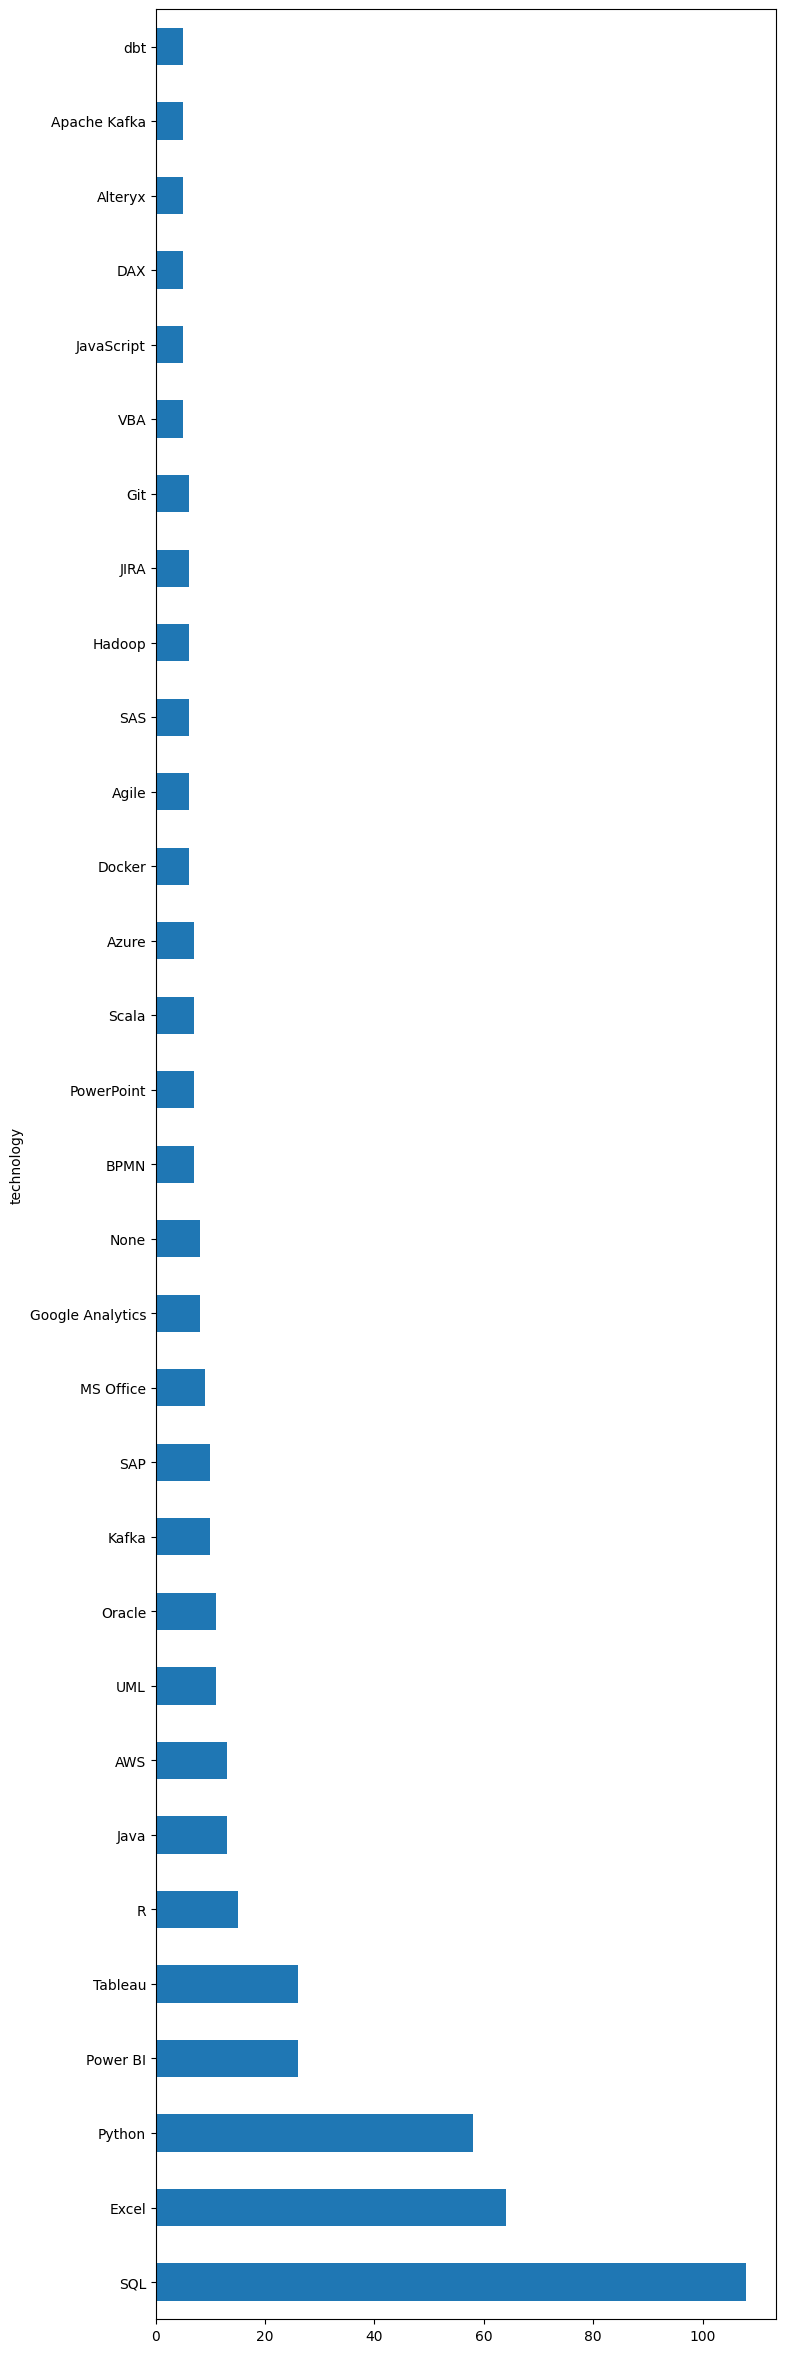

In [83]:
ser[ser >= 5].plot(kind='barh', figsize=(8, 30))

In [84]:
d = {
    'Power BI': ['PowerBI', 'Microsoft PowerBI', 'MS Power BI', 'MS PowerBI', 'Microsoft Power BI'],
    'MS Office': ['Microsoft Office', 'Office 365'],
    'Excel': ['MS Excel', 'Microsoft Excel'],
    'Python' : ['Pandas', 'PyTorch', 'TensorFlow', 'Tensorflow' 'PySpark', 'Matplotlib', 'Seaborn', 'Dash'], # treat python libraries as just python
    'PowerPoint': ['Power Point', 'MS Power Point', 'MS PowerPoint' 'Microsoft Power Point', 'Microsoft PowerPoint'],
    'Jira':['JIRA', 'jira'],
    'MS Word': ['Microsoft Word', 'Word'] 
}

In [85]:
# goes through each key and its value from d dict
# and if value is in unpivoted DataFrame, then replace it with key
for key in d:
    for val in d[key]:
        if val in unpivoted.technology.values:
            unpivoted.replace(val, key, inplace=True)

### Loading data into the data base

#### Reordering DataFrame fields to match the database schema to avoid error

In [86]:
conn, cur = db.connect_to_db()

In [87]:
db_headers = db.get_headers(conn,cur)

In [88]:
df = df[db_headers]

#### Loading database connection parameters

In [89]:
conn_params =  db.conn_params

In [90]:
conn_params

{'dbname': 'jobs',
 'user': 'postgres',
 'password': 'admin',
 'host': 'localhost',
 'port': '5432'}

#### Creating engine to load data to database

In [91]:
engine = create_engine('postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'.format(**conn_params))

In [92]:
df.replace("True", True, inplace=True)
df.replace("False", False, inplace=True)
df.replace('None', None, inplace=True)

Loading `jobs info` data into data base as `jobs_info` table

In [93]:
df.to_sql('jobs_info', engine, if_exists='append', index=False)

193

Loading `unpivoted technologies` data into data base as `technologies_per_job` table

In [94]:
unpivoted.to_sql('technologies_per_job', engine, if_exists='append', index=False)

765

## Deleting the uncleaned jobs CSV file
Once the data is loaded into the database, the uncleaned CSV file is deleted.

In [95]:
pandas_csv.delete_file(prev_dir + "data\\uncleaned_jobs.csv")

The file c:\Users\ivanb\OneDrive\Рабочий стол\scraping_ETL\data\uncleaned_jobs.csv has been deleted successfully.
